In [20]:
import hvplot.pandas
import pandas as pd
import geopy.distance
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

from school_digger_api_key import geoapify_key

In [21]:
school_data_22_19= Path("../P1_Resources/school_data_22-19.csv")
school_data_22_19_df=pd.read_csv(school_data_22_19)
school_data_22_21 = Path("../P1_Resources/school_data_22-21.csv")
school_data_22_21_df=pd.read_csv(school_data_22_21)

In [22]:
austincoord=(30.267200,-97.743100)
lats_22_21=school_data_22_21_df['lats'].to_numpy()
lats_22_19=school_data_22_19_df['lats'].to_numpy()
longs_22_21=school_data_22_21_df['longs'].to_numpy()
longs_22_19=school_data_22_19_df['longs'].to_numpy()
ditsance_to_austin_center_22_21=[]
ditsance_to_austin_center_22_19=[]

In [23]:
for i in range(len(lats_22_21)):
    coord=(lats_22_21[i],longs_22_21[i])
    ditsance_to_austin_center_22_21.append(geopy.distance.geodesic(coord, austincoord).km)
for i in range(len(lats_22_19)):
    coord=(lats_22_19[i],longs_22_19[i])
    ditsance_to_austin_center_22_19.append(geopy.distance.geodesic(coord, austincoord).km)

In [24]:
school_data_22_21_df['Distance_to_City_Center']=ditsance_to_austin_center_22_21
school_data_22_19_df['Distance_to_City_Center']=ditsance_to_austin_center_22_19
school_data_22_21_df['Distance_to_City_Center']=school_data_22_21_df['Distance_to_City_Center']/1.609344
school_data_22_19_df['Distance_to_City_Center']=school_data_22_19_df['Distance_to_City_Center']/1.609344



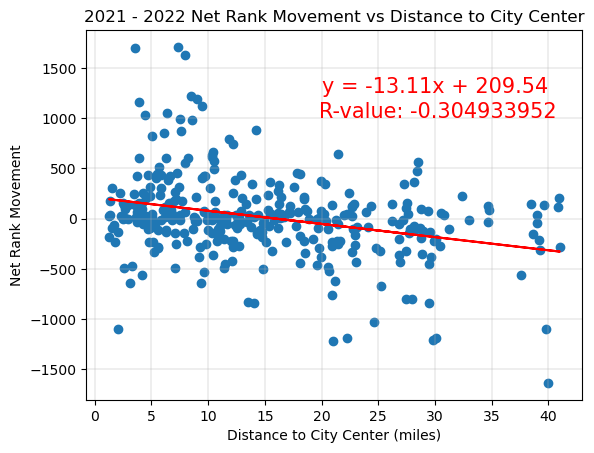

In [68]:

x_values = school_data_22_21_df['Distance_to_City_Center']
y_values = school_data_22_21_df['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,1250),fontsize=15,color="red")
plt.annotate(r_value,(19.8,1000),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2021 - 2022 Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2021 - 2022 Net Rank Movement vs Distance to City Center')
plt.show()

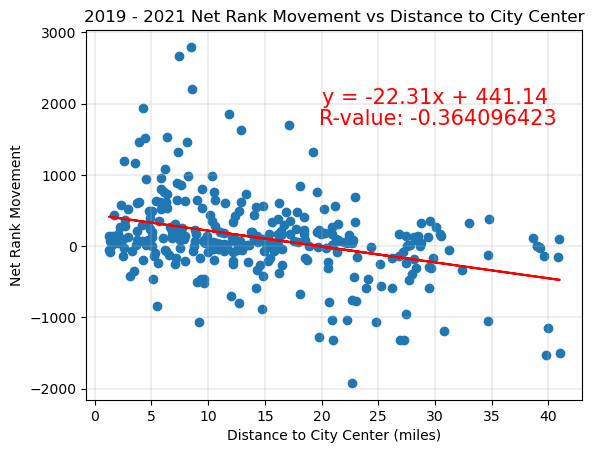

In [69]:
school_data_22_19_df['rankMovements']=school_data_22_19_df['ranks21']-school_data_22_19_df['ranks19']
x_values = school_data_22_19_df['Distance_to_City_Center']
y_values = school_data_22_19_df['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2000),fontsize=15,color="red")
plt.annotate(r_value,(19.8,1700),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2019 - 2021 Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2019 - 2021 Net Rank Movement vs Distance to City Center')
plt.show()

In [63]:
%%capture --no-display

#map_plot = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='High'].hvplot.points(
map_plot = school_data_22_21_df.hvplot.points(
    "longs",
    "lats",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "averageStandardScores22",
    scale = .8,
    color = "countyNames",
    title='2022 Average Standard Scores'
)
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longs,lats]   (countyNames,averageStandardScores22)

In [64]:
#map_plot = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='High'].hvplot.points(
map_plot = school_data_22_21_df.hvplot.points(
    "longs",
    "lats",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "averageStandardScores21",
    scale = .8,
    color = "countyNames",
    title='2021 Average Standard Scores'
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longs,lats]   (countyNames,averageStandardScores21)

In [65]:
#map_plot = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='High'].hvplot.points(
map_plot = school_data_22_19_df.hvplot.points(
    "longs",
    "lats",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "averageStandardScores19",
    scale = .8,
    color = "countyNames",
    title='2019 Average Standard Scores'
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longs,lats]   (countyNames,averageStandardScores19)

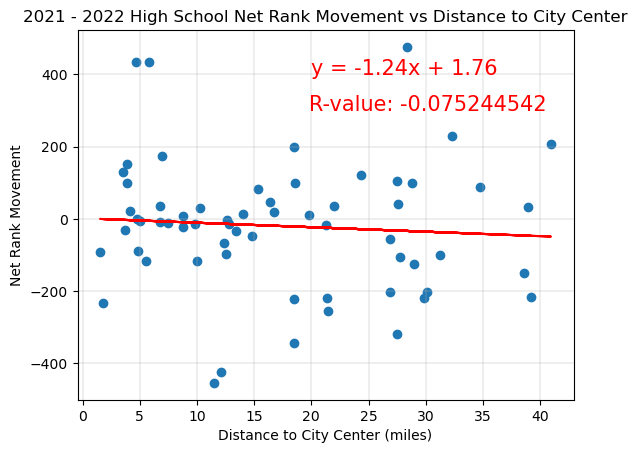

In [70]:
x_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='High']['Distance_to_City_Center']
y_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='High']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,400),fontsize=15,color="red")
plt.annotate(r_value,(19.8,300),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2021 - 2022 High School Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2021 - 2022 High School Net Rank Movement vs Distance to City Center')
plt.show()

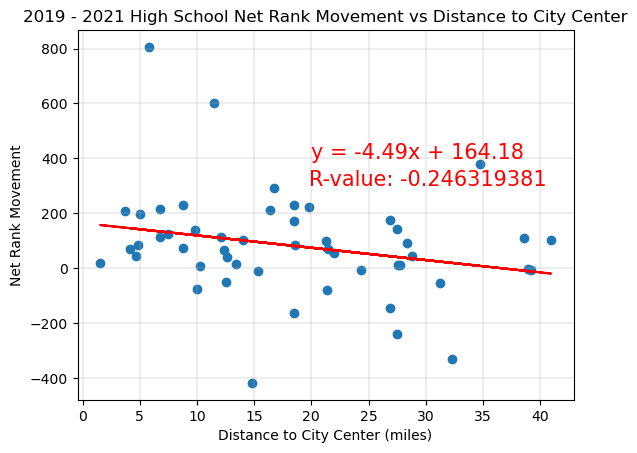

In [71]:
x_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='High']['Distance_to_City_Center']
y_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='High']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,400),fontsize=15,color="red")
plt.annotate(r_value,(19.8,300),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2019 - 2021 High School Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2019 - 2021 High School Net Rank Movement vs Distance to City Center')
plt.show()

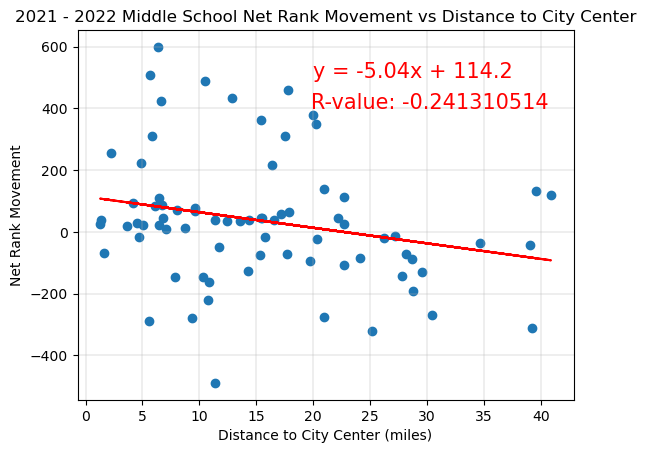

In [72]:
x_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='Middle']['Distance_to_City_Center']
y_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='Middle']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,500),fontsize=15,color="red")
plt.annotate(r_value,(19.8,400),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2021 - 2022 Middle School Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2021 - 2022 Middle School Net Rank Movement vs Distance to City Center')
plt.show()

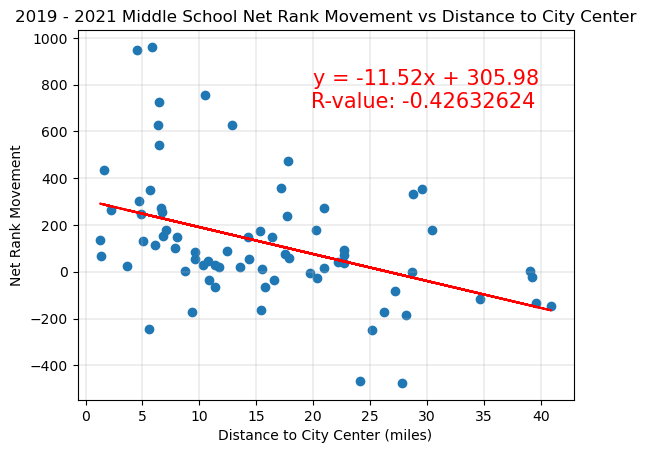

In [73]:
x_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='Middle']['Distance_to_City_Center']
y_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='Middle']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,800),fontsize=15,color="red")
plt.annotate(r_value,(19.8,700),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2019 - 2021 Middle School Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2019 - 2021 Middle School Net Rank Movement vs Distance to City Center')
plt.show()

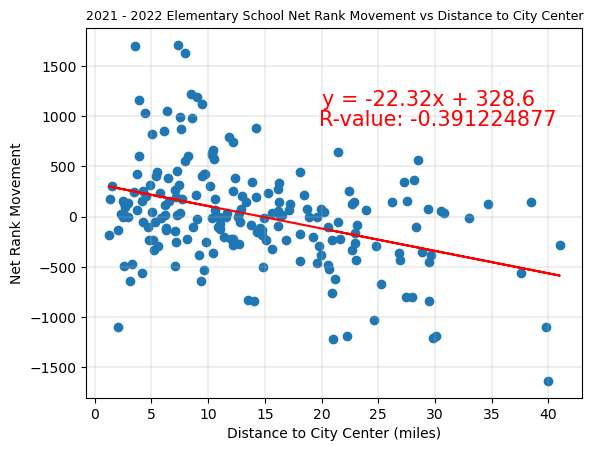

In [79]:
x_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='Elementary']['Distance_to_City_Center']
y_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='Elementary']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,1100),fontsize=15,color="red")
plt.annotate(r_value,(19.8,900),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2021 - 2022 Elementary School Net Rank Movement vs Distance to City Center',fontsize = 9)
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2021 - 2022 Elementary School Net Rank Movement vs Distance to City Center')
plt.show()

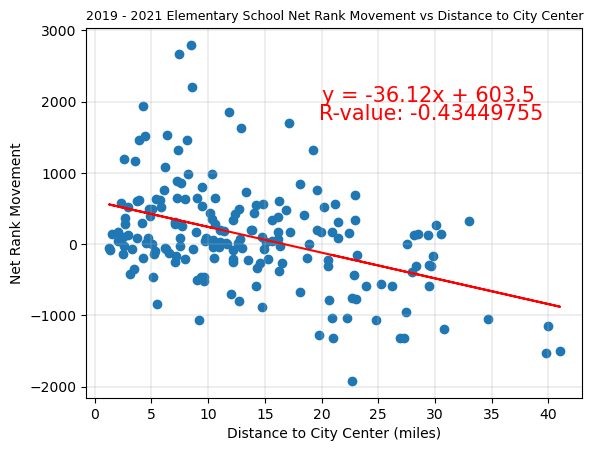

In [80]:
x_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='Elementary']['Distance_to_City_Center']
y_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='Elementary']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2000),fontsize=15,color="red")
plt.annotate(r_value,(19.8,1750),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2019 - 2021 Elementary School Net Rank Movement vs Distance to City Center',fontsize = 9)
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2019 - 2021 Elementary School Net Rank Movement vs Distance to City Center')
plt.show()

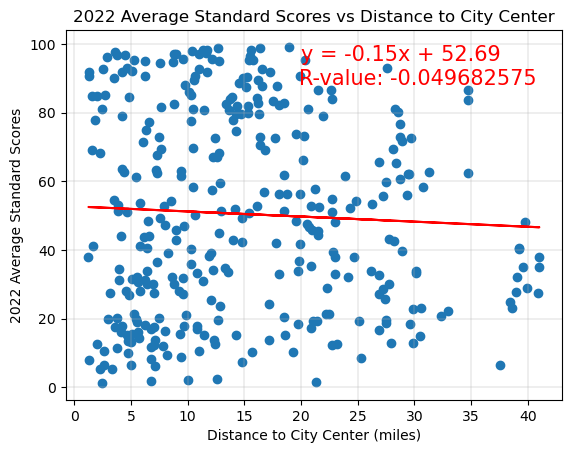

In [76]:
x_values = school_data_22_21_df['Distance_to_City_Center']
y_values = school_data_22_21_df['averageStandardScores22']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,95),fontsize=15,color="red")
plt.annotate(r_value,(19.8,88),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('2022 Average Standard Scores')
plt.title('2022 Average Standard Scores vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2022 Average Standard Scores vs Distance to City Center')
plt.show()

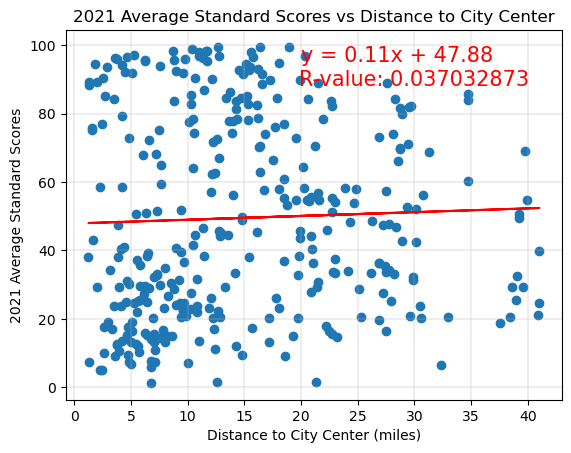

In [77]:
x_values = school_data_22_21_df['Distance_to_City_Center']
y_values = school_data_22_21_df['averageStandardScores21']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,95),fontsize=15,color="red")
plt.annotate(r_value,(19.8,88),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('2021 Average Standard Scores')
plt.title('2021 Average Standard Scores vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2021 Average Standard Scores vs Distance to City Center')
plt.show()

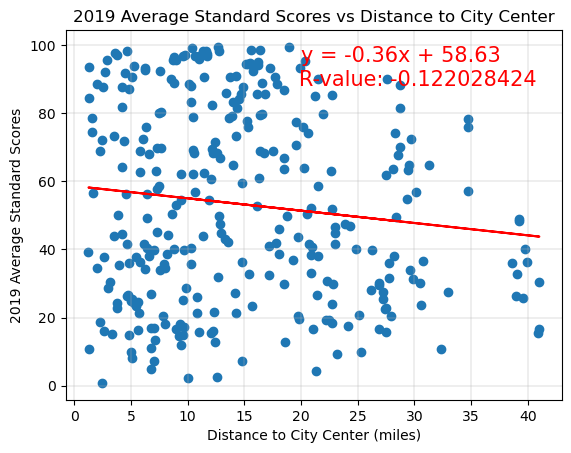

In [78]:
x_values = school_data_22_19_df['Distance_to_City_Center']
y_values = school_data_22_19_df['averageStandardScores19']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,95),fontsize=15,color="red")
plt.annotate(r_value,(19.8,88),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('2019 Average Standard Scores')
plt.title('2019 Average Standard Scores vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('2019 Average Standard Scores vs Distance to City Center')
plt.show()